# Import statements

In [ ]:
import torch
from torchvision import transforms, datasets
import torch.nn as nn
from torch import optim as optim

# Select Device

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


# Load dataset and declare training parameters

In [ ]:
training_parameters = {
    "n_epochs": 100,
    "batch_size": 100,
}
data_loader = torch.utils.data.DataLoader(
  
  datasets.MNIST('./', train=True, download=True,
                             transform=transforms.Compose([
                               transforms.ToTensor(),
                               transforms.Normalize(
                                 (0.5,), (0.5,))
                             ])),
  batch_size=training_parameters["batch_size"], shuffle=True)

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
num_batches = len(data_loader)
print("Number of batches: ",num_batches)

Number of batches:  600


# Display an iamge

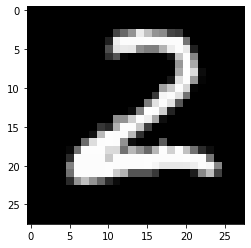

In [ ]:
%matplotlib inline 
from matplotlib import pyplot as plt

for x,_ in data_loader:
    plt.imshow(x.numpy()[0][0], cmap='gray')
    break

# Define Generator and Discriminator

In [ ]:
class GeneratorModel(nn.Module):
    def __init__(self):
        super(GeneratorModel, self).__init__()
        input_dim = 100
        output_dim = 784

        self.hidden_layer1 = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.LeakyReLU(0.2)
        )

        self.hidden_layer2 = nn.Sequential(
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2)
        )

        self.hidden_layer3 = nn.Sequential(
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2)
        )

        self.hidden_layer4 = nn.Sequential(
            nn.Linear(1024, output_dim),
            nn.Tanh()
        )
    
    def forward(self, x):
        output = self.hidden_layer1(x)
        output = self.hidden_layer2(output)
        output = self.hidden_layer3(output)
        output = self.hidden_layer4(output)
        return output.to(device)

class DiscriminatorModel(nn.Module):
    def __init__(self):
        super(DiscriminatorModel, self).__init__()
        input_dim = 784
        output_dim = 1

        self.hidden_layer1 = nn.Sequential(
            nn.Linear(input_dim, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3)
        )

        self.hidden_layer2 = nn.Sequential(
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3)
        )

        self.hidden_layer3 = nn.Sequential(
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3)
        )

        self.hidden_layer4 = nn.Sequential(
            nn.Linear(256, output_dim),
            nn.Sigmoid()
        )

    def forward(self, x):
        output = self.hidden_layer1(x)
        output = self.hidden_layer2(output)
        output = self.hidden_layer3(output)
        output = self.hidden_layer4(output)

        return output.to(device)

discriminator = DiscriminatorModel()
generator = GeneratorModel()
discriminator.to(device)
generator.to(device)

GeneratorModel(
  (hidden_layer1): Sequential(
    (0): Linear(in_features=100, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
  )
  (hidden_layer2): Sequential(
    (0): Linear(in_features=256, out_features=512, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
  )
  (hidden_layer3): Sequential(
    (0): Linear(in_features=512, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
  )
  (hidden_layer4): Sequential(
    (0): Linear(in_features=1024, out_features=784, bias=True)
    (1): Tanh()
  )
)

# Initilize Optimizers, loss function


In [ ]:
discriminator_optimizer = optim.Adam(discriminator.parameters(), lr=0.0002)
generator_optimizer = optim.Adam(generator.parameters(), lr=0.0002)

loss = nn.BCELoss()


# Training Loop

[0/100]: loss_d: 0.445, loss_g: 3.313
[1/100]: loss_d: 0.540, loss_g: 1.741
[2/100]: loss_d: 0.451, loss_g: 2.145
[3/100]: loss_d: 0.230, loss_g: 3.012
[4/100]: loss_d: 0.249, loss_g: 3.315
[5/100]: loss_d: 0.283, loss_g: 2.594
[6/100]: loss_d: 0.280, loss_g: 2.655
[7/100]: loss_d: 0.289, loss_g: 2.580
[8/100]: loss_d: 0.320, loss_g: 2.334
Training Steps Completed:  499


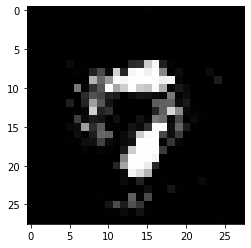

[9/100]: loss_d: 0.313, loss_g: 2.415
[10/100]: loss_d: 0.341, loss_g: 2.213
[11/100]: loss_d: 0.375, loss_g: 2.048
[12/100]: loss_d: 0.367, loss_g: 2.012
[13/100]: loss_d: 0.381, loss_g: 2.038
[14/100]: loss_d: 0.379, loss_g: 1.944
[15/100]: loss_d: 0.430, loss_g: 1.755
[16/100]: loss_d: 0.434, loss_g: 1.688
[17/100]: loss_d: 0.437, loss_g: 1.692
[18/100]: loss_d: 0.421, loss_g: 1.766
Training Steps Completed:  499


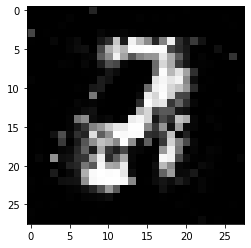

[19/100]: loss_d: 0.439, loss_g: 1.725
[20/100]: loss_d: 0.459, loss_g: 1.587
[21/100]: loss_d: 0.473, loss_g: 1.521
[22/100]: loss_d: 0.466, loss_g: 1.572
[23/100]: loss_d: 0.465, loss_g: 1.567
[24/100]: loss_d: 0.462, loss_g: 1.569
[25/100]: loss_d: 0.490, loss_g: 1.446
[26/100]: loss_d: 0.493, loss_g: 1.423
[27/100]: loss_d: 0.503, loss_g: 1.383
[28/100]: loss_d: 0.507, loss_g: 1.392
Training Steps Completed:  499


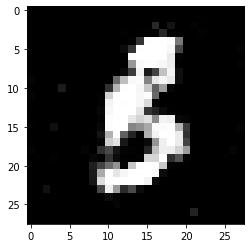

[29/100]: loss_d: 0.510, loss_g: 1.361
[30/100]: loss_d: 0.514, loss_g: 1.358
[31/100]: loss_d: 0.531, loss_g: 1.308
[32/100]: loss_d: 0.519, loss_g: 1.316
[33/100]: loss_d: 0.531, loss_g: 1.276
[34/100]: loss_d: 0.538, loss_g: 1.262
[35/100]: loss_d: 0.535, loss_g: 1.273
[36/100]: loss_d: 0.538, loss_g: 1.269
[37/100]: loss_d: 0.537, loss_g: 1.253
[38/100]: loss_d: 0.551, loss_g: 1.200
Training Steps Completed:  499


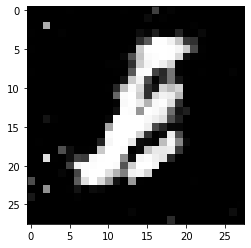

[39/100]: loss_d: 0.556, loss_g: 1.199
[40/100]: loss_d: 0.555, loss_g: 1.189
[41/100]: loss_d: 0.557, loss_g: 1.198
[42/100]: loss_d: 0.563, loss_g: 1.176
[43/100]: loss_d: 0.569, loss_g: 1.142
[44/100]: loss_d: 0.567, loss_g: 1.141
[45/100]: loss_d: 0.571, loss_g: 1.143
[46/100]: loss_d: 0.572, loss_g: 1.116
[47/100]: loss_d: 0.575, loss_g: 1.108
[48/100]: loss_d: 0.578, loss_g: 1.108
Training Steps Completed:  499


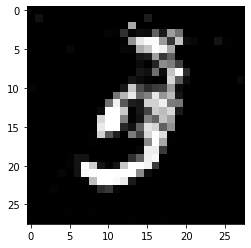

[49/100]: loss_d: 0.577, loss_g: 1.108
[50/100]: loss_d: 0.581, loss_g: 1.087
[51/100]: loss_d: 0.586, loss_g: 1.073
[52/100]: loss_d: 0.595, loss_g: 1.049
[53/100]: loss_d: 0.587, loss_g: 1.078
[54/100]: loss_d: 0.590, loss_g: 1.060
[55/100]: loss_d: 0.593, loss_g: 1.042
[56/100]: loss_d: 0.598, loss_g: 1.039
[57/100]: loss_d: 0.598, loss_g: 1.022
[58/100]: loss_d: 0.593, loss_g: 1.043
Training Steps Completed:  499


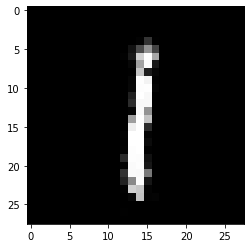

[59/100]: loss_d: 0.596, loss_g: 1.038
[60/100]: loss_d: 0.600, loss_g: 1.026
[61/100]: loss_d: 0.601, loss_g: 1.050
[62/100]: loss_d: 0.595, loss_g: 1.047
[63/100]: loss_d: 0.597, loss_g: 1.025
[64/100]: loss_d: 0.605, loss_g: 1.022
[65/100]: loss_d: 0.603, loss_g: 1.023
[66/100]: loss_d: 0.604, loss_g: 1.019
[67/100]: loss_d: 0.605, loss_g: 1.031
[68/100]: loss_d: 0.600, loss_g: 1.032
Training Steps Completed:  499


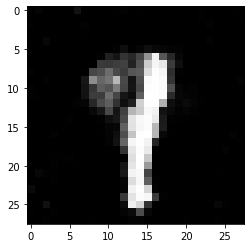

[69/100]: loss_d: 0.607, loss_g: 0.998
[70/100]: loss_d: 0.610, loss_g: 0.987
[71/100]: loss_d: 0.608, loss_g: 1.009
[72/100]: loss_d: 0.605, loss_g: 1.009
[73/100]: loss_d: 0.607, loss_g: 1.004
[74/100]: loss_d: 0.612, loss_g: 0.998
[75/100]: loss_d: 0.614, loss_g: 0.979
[76/100]: loss_d: 0.613, loss_g: 0.981
[77/100]: loss_d: 0.617, loss_g: 0.979
[78/100]: loss_d: 0.617, loss_g: 0.969
Training Steps Completed:  499


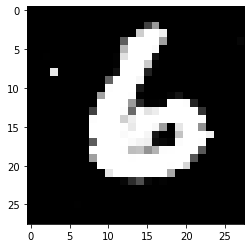

[79/100]: loss_d: 0.616, loss_g: 0.969
[80/100]: loss_d: 0.617, loss_g: 0.971
[81/100]: loss_d: 0.613, loss_g: 0.980
[82/100]: loss_d: 0.621, loss_g: 0.955
[83/100]: loss_d: 0.617, loss_g: 0.975
[84/100]: loss_d: 0.621, loss_g: 0.950
[85/100]: loss_d: 0.620, loss_g: 0.977
[86/100]: loss_d: 0.620, loss_g: 0.966
[87/100]: loss_d: 0.620, loss_g: 0.959
[88/100]: loss_d: 0.622, loss_g: 0.952
Training Steps Completed:  499


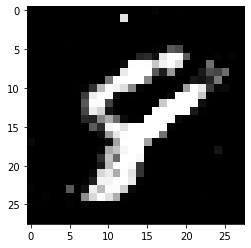

[89/100]: loss_d: 0.617, loss_g: 0.985
[90/100]: loss_d: 0.618, loss_g: 0.976
[91/100]: loss_d: 0.620, loss_g: 0.959
[92/100]: loss_d: 0.623, loss_g: 0.950
[93/100]: loss_d: 0.624, loss_g: 0.942
[94/100]: loss_d: 0.622, loss_g: 0.952
[95/100]: loss_d: 0.623, loss_g: 0.948
[96/100]: loss_d: 0.623, loss_g: 0.947
[97/100]: loss_d: 0.626, loss_g: 0.933
[98/100]: loss_d: 0.629, loss_g: 0.938
Training Steps Completed:  499


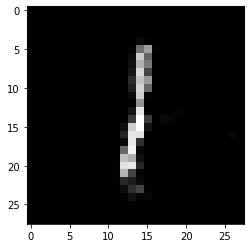

[99/100]: loss_d: 0.626, loss_g: 0.942


In [ ]:
n_epochs = training_parameters["n_epochs"]
batch_size = training_parameters["batch_size"]

for epoch_idx in range(n_epochs):
    G_loss = []
    D_loss = []
    for batch_idx, data_input in enumerate(data_loader):
        
        
        noise = torch.randn(batch_size,100).to(device)
        generated_data = generator(noise) # batch_size X 784
        
        # Discriminator
        true_data = data_input[0].view(batch_size, 784).to(device) # batch_size X 784
        digit_labels = data_input[1] # batch_size
        true_labels = torch.ones(batch_size).to(device)
        
        discriminator_optimizer.zero_grad()

        discriminator_output_for_true_data = discriminator(true_data).view(batch_size)
        true_discriminator_loss = loss(discriminator_output_for_true_data, true_labels)

        discriminator_output_for_generated_data = discriminator(generated_data.detach()).view(batch_size)
        generator_discriminator_loss = loss(
            discriminator_output_for_generated_data, torch.zeros(batch_size).to(device)
        )
        discriminator_loss = (
            true_discriminator_loss + generator_discriminator_loss
        ) / 2
        
        discriminator_loss.backward()
        discriminator_optimizer.step()

        D_loss.append(discriminator_loss.data.item())
        
        
        # Generator

        generator_optimizer.zero_grad()
        generated_data = generator(noise)
        discriminator_output_on_generated_data = discriminator(generated_data).view(batch_size)
        generator_loss = loss(discriminator_output_on_generated_data, true_labels)
        generator_loss.backward()
        generator_optimizer.step()
        
        G_loss.append(generator_loss.data.item())
        if ((batch_idx + 1)% 500 == 0 and (epoch_idx + 1)%10 == 0):
            print("Training Steps Completed: ", batch_idx)
            
            with torch.no_grad():
                noise = torch.randn(batch_size,100).to(device)
                generated_data = generator(noise).cpu().view(batch_size, 28, 28)
                for x in generated_data:
                    plt.imshow(x.detach().numpy(), interpolation='nearest',cmap='gray')
                    plt.show()

                    break


    print('[%d/%d]: loss_d: %.3f, loss_g: %.3f' % (
            (epoch_idx), n_epochs, torch.mean(torch.FloatTensor(D_loss)), torch.mean(torch.FloatTensor(G_loss))))
    